In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1주차 Recap

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import random

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/23w MLWIKI/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder 

le_sex = LabelEncoder()
le_sex.fit(df["sex"])
df["sex"] = le_sex.transform(df["sex"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
le_region = LabelEncoder()
le_region.fit(df["region"]) 
df["region"] = le_region.transform(df["region"]) 
df["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [ ]:
le_smoker = LabelEncoder() 
le_smoker.fit(df["smoker"])
df["smoker"] = le_smoker.transform(df["smoker"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 머신러닝 학습 과정

(0) 태스크 파악 -> (1) 데이터 확보 -> (2) 데이터 전처리 및 EDA-> (3) 모델 구축 -> (4) 비용 계산 -> (5) 최적화 -> (6) 모델 완성 및 태스크 적용


위 과정들 중 (2)~(5)는 상황에 따라 끊임없이(^^) 반복될 수 있다.  

#Estimation


Estimation(예측)이란 지도학습의 일종으로 연속적인 형태의 값을 예측하는 행위를 총칭한다.

Estimation의 아이디어를 바탕으로 할 수 있는 일들에는 다음과 같은 것들이 있다.



> 단순 예측

주택 가격 예측 등

> 예측 + 시계열 분석

주가 예측, 환율 예측, 매출액 성장 예측 등

> 예측 + CV

GAN, 차원 변경 등

> 예측 + NLP

NLG(Natural Language Generation), 기계 번역 등









# Linear Regression pt.1 ( Linearity and models)

선형사상(linear map), 또는 어떤 함수가 선형적이라는 것의 의미: 영역 내 임의의 수에 대해 가산성(Additivity)과 균질성(Homogeneity)을 동일 영역 내에서 정의할 수 있는 것.

   $$ Additivity \\ f(x+y) = f(x) + f(y) $$

$$ Homogeneity \\ \alpha\, f(x) = f(\alpha\, x)$$

왜 통계적 머신러닝은 선형성을 좋아하는가?



> 데이터에 대한 직관적인 해석을 할 수 있다. 



> 연산의 효율성이 높다.



> 추론이 용이하다.



> 통계 모델들의 기본 가정이기에 지켜야 한다.











왜 현대의 딥러닝은 비선형성을 좋아하는가?




> 복잡한 데이터에 대한 해석을 가능케 한다.

> 모델을 데이터에 유연하게 적응 시킬 수 있다.

> 인간의 사고과정과 유사하다.









2주차의 가장 큰 목표 중 하나는 선형성에 대한 이해를 바탕으로 점차 비선형 모델들이 많아지는 현대의 기계학습을 이해할 수 있게 되는 것이다.

단순 선형 회귀(feature의 개수가 한 개) $$ \hat{y} = b_{1}x+b_{0}$$

단순 선형 회귀식은 선형 사상에 부합한다.

$$f(\hat{y}) = f(b_{1}x+b_{0}) = b_{1}f(x)+f(b_{0}) $$

다중 선형 회귀(feature의 개수가 여러 개)
$$ \hat{y} = b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}+b_{0} $$

다중 선형 회귀 식 역시 선형 사상에 부합한다.

$$ f(\hat{y}) = f(b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}+b_{0}) = b_{n}\sum{x_{n}}+b_{0} $$

다중 선형 회귀의 일반적 표현 방식
$$ \hat{y} = \bar{b}\bar{x}+b_{0} $$

비선형 회귀 (지수회귀, RandomForest, GradientBoosting, Decision Trees ... 등)

#Linear Regression pt.2 (Data Split, Loss function, Optimizations)

In [ ]:
#모델의 학습 시 데이터셋은 아래와 같이 Training set과 Test set으로 분리된다. 
#Training set에서 최적화된 모델에 Test set 데이터를 입력해 성능을 평가하게 된다.
#train, valid, test.

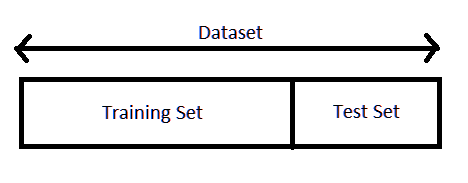

In [ ]:
#현실의 데이터에는 X가 굉장히 많기에 다양한 feature(X)를 바탕으로 타겟 데이터(y)를 예측하는 다중선형회귀를 먼저 공부해 보자.
#OLS(Ordinary Least Squares Loss). 다중선형회귀에 일반적으로 사용되는 비용함수.
#제곱을 하는 이유는? 잘 생각해 보자. 

$$ Ordinary \ Least \ Squares \ Loss = \sum{(y - \hat{y})^2} $$

In [ ]:
#최적화(Optimizations)는 비용함수를 최소화하는 과정과 같다.
#위에서 제안한 OLS loss function을 최소화하자.

#argmin 은 대상이 되는 수식을 최소화 해주는 값들을 찾자는 의미. 

$$ \underset{b_{0}, b_{1}, ... , b_{n}}{\operatorname{argmin}} 
(\sum{(y-(b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}+b_{0}))^2}) $$

In [ ]:
#단순 선형 회귀를 예시로 최적화를 직접 수행해 보자. 

In [ ]:
#random.normal(mean, std)는 정규분포 속 랜덤 값을 추출하는 모듈.
x = np.array([np.random.normal(2, 2) for i in range(10000)])
y = np.array(x*2)  
print("y:", np.mean(y), "x: ", np.mean(x) ) #y는 x와 매우 비슷한 정규분포지만 y의 평균이 x의 두 배로 상정.

y: 3.994941582753908 x:  1.997470791376954


모델은 x가 한 개이고 절편(b0)이 없는 단순선형회귀 모델이라고 가정하자.

단순선형회귀(no intercept)    $$ \hat{y} = b_{1}x$$

Loss function(OLS)

$$ \sum{(y-b_{1}x)^2}    $$

In [ ]:
#데이터의 제작 의도가 그러하듯이 이상적으로는 b1이 2가 되었으면 좋겠음. 
#loss function을 만들어보자.
def loss(b_1):
  return sum((y - b_1*x)**2)

In [ ]:
b_1_list = [np.random.normal(0, 100) for i in range(10000)] #어떤 b1이 가장 낮은 loss를 내는지 잘 모르니까 랜덤한 값들로 10,000개 생성해보기. 
loss_list = [loss(b_1) for b_1 in b_1_list] #각 b_1에 대해 연산한 loss들을 loss_list에 저장.
b_1_list[:10]

[-90.39541959778316,
 89.80375210482553,
 -80.8269661912114,
 -50.09376187564144,
 101.63657984791901,
 7.071956769177984,
 -135.41122448792015,
 83.19310063572111,
 -72.90748002070362,
 25.50698042336037]

Text(0.5, 1.0, 'loss function is minimized at the point b1 = 2 ')

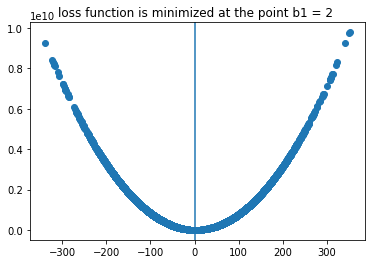

In [ ]:
plt.scatter(b_1_list, loss_list)
plt.axvline(2) #수직선을 그려주는 함수
plt.title("loss function is minimized at the point b1 = 2 ") #b1이 2일 때 이 비용함수가 최소화되는 것을 볼 수 있다. 

In [ ]:
b_1_list[np.argmin(loss_list)]

2.0142160532388305

그림에서 b1 = 2라는 지점은 최소 지점이면서 b1에 대해 미분한 기울기가 0이되는 지점임을 확인할 수 있다. 이를 수학적으로 이해해보자.

Optimizing Model = Minimizing Loss function =  Differentiating loss function until its global minimum

$$ {∂\sum{(y-b_{1}x)^2}\over∂b_{1}} = ∑-2x(y-b_{1}x) = 0   $$


$$ ∑b_{1} = \frac{\sum{y}}{\sum{x}} $$

$$ Divide\ Both \ sides\ by\ n $$

$$ \bar{b_{1}} = \frac{\bar{y}}{\bar{x}} $$

$$\bar{y} = 4 , \bar{x} = 2$$

$$ \bar{b_{1}}=2 $$

비록 b1 하나의 계수만이 있었기에 쉽게 미분할 수 있었지만 모델 복잡도가 늘어날수록 계수들은 점점 늘어난다. 컴퓨터를 활용해 쉽게 미분계수를 연산할 수 있는데 다수의 계수들에 대한 1차 편미분 값을 활용해 최적화하는 과정이 딥러닝에서 그렇게 유명한 **Gradient Descent**이다.

# Linear Regression pt.3 (Parameters and HyperParameters)

In [ ]:
#Parameters vs HyperParameters
#Parameters는 학습 과정에서 갱신되는 값을 의미한다. 모수, 가중치나 계수라고도 부른다.
#Hyperparameters는 학습 이전에 사용자가 설정하는 값을 의미한다.
#Linear Regression을 예로 들면, 학습 과정에서 변하는 값들인 b0~bn이 parameters인 반면 변수의 개수, 비용함수를 무엇으로 연산할 것인지 등의 이슈는 hyperparameters.


다양한 Loss function들의 예시

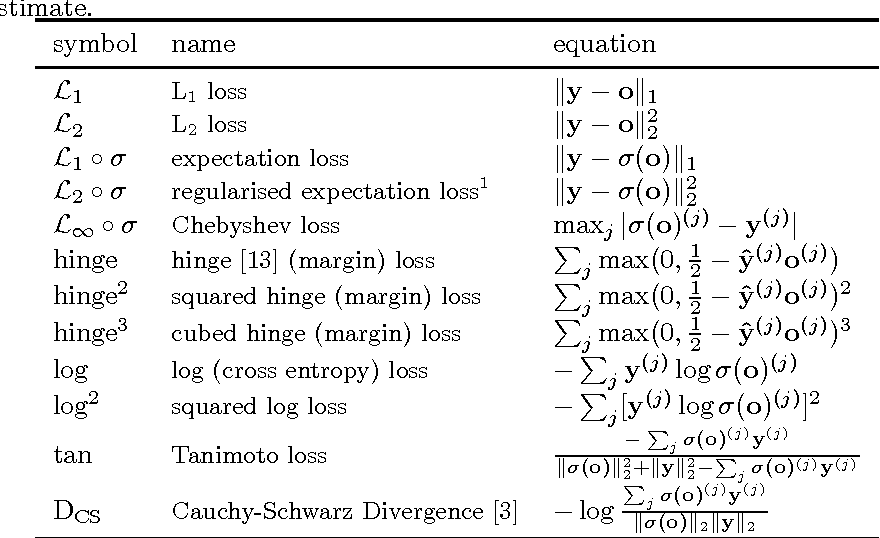

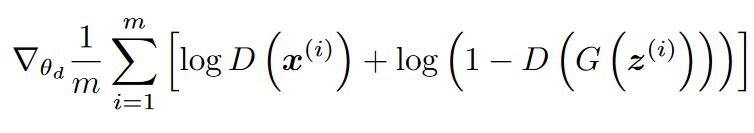

# Polynomial Regression, Evaluation and Overfitting

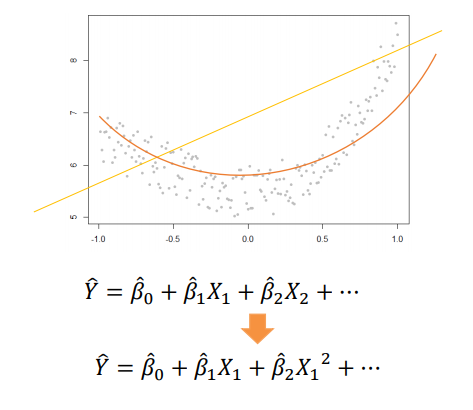

$$ $$

데이터의 형태가 위와 같이 분포되어 있다면 직선(선형적)으로 모델을 구성하는 것보다는 곡선(비선형적)으로 모델을 구성하는 편이 낫다. 다항회귀에 대해 알아보자. 

다항회귀는 바라보는 관점에 따라 선형 회귀일수도, 비선형 회귀일수도 있다. 이 부분은 넘어가도록 하자.


Ex. 2차 다항회귀(변수 1개)
$$ y = b_{1}x_{1}+b_{2}x_{1}^2+b_{0} $$

Ex. 2차 다항회귀(변수 2개)
$$ y = b_{1}x_{1}+b_{2}x_{1}^2 + b_{3}x_{1}x_{2}+b_{4}x_{2}+b_{5}x_{2}^2 + b_{0}$$

**Evaluation**

Train score VS Validation score VS Test score

Train score: 학습한 데이터셋을 그대로 검증할 때 사용해서 낸 점수이다. 일반적으로 제일 높지만 쓸데 없다.

Validation score: 데이터셋에서 검증용으로 따로 빼 둔 부분을 가지고 모델에 넣은 점수.

Test score: 데이터셋 자체에 없던 새로운 데이터(제 3의 데이터)를 모델에 넣어 낸 점수. **현실(task)에 얼마나 가까운지를 보는 점수이기에 실질적인 평가 기준**. 공모전 등에서 평가 척도로 가장 많이 사용. 

**Overfitting(과적합)이란 무엇인가?**

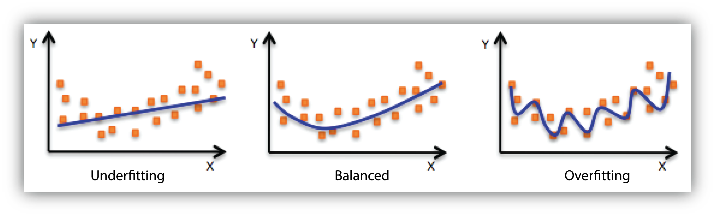

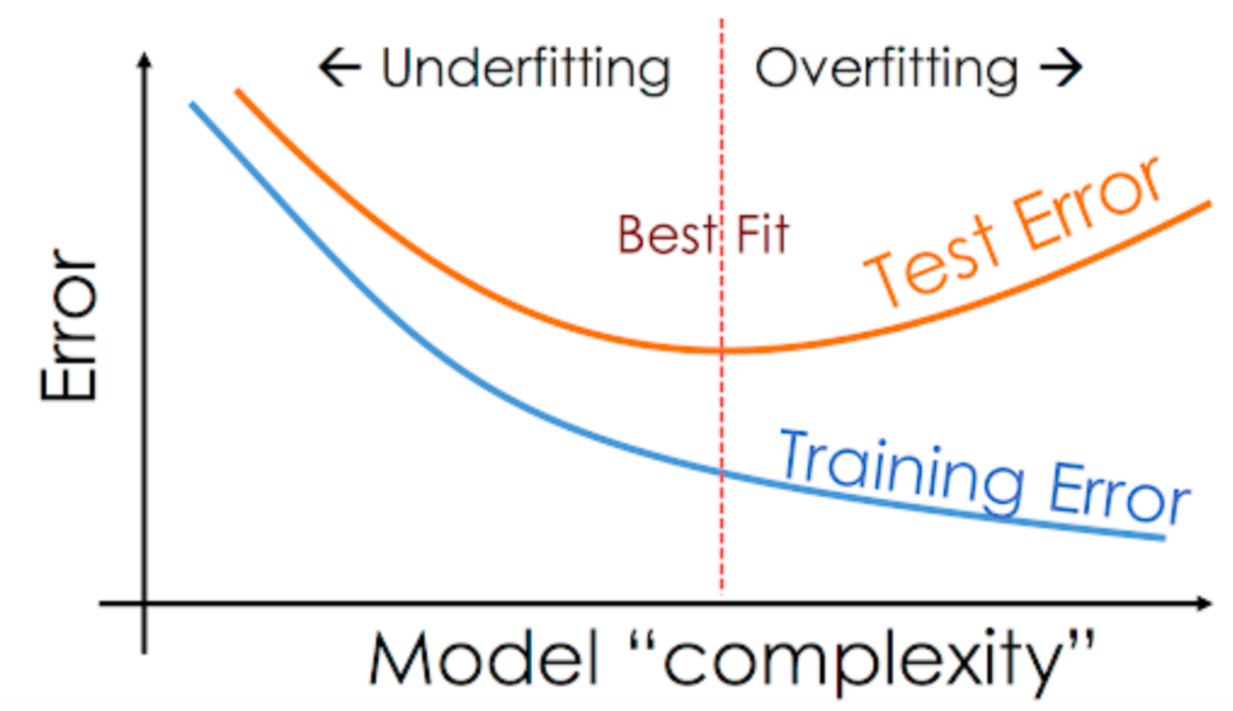

# Decision Trees pt.1 (Overview)

규칙에 따라 독립 변수 공간을 분할하는 과정을 반복해 분류와 회귀를 수행하는 CART(Classification And Regression Trees) 알고리즘의 일종이다. Trees라는 이름에 걸맞게 나무의 구조를 갖고 있는 것이 특징이다. 스무고개 게임과 같다.

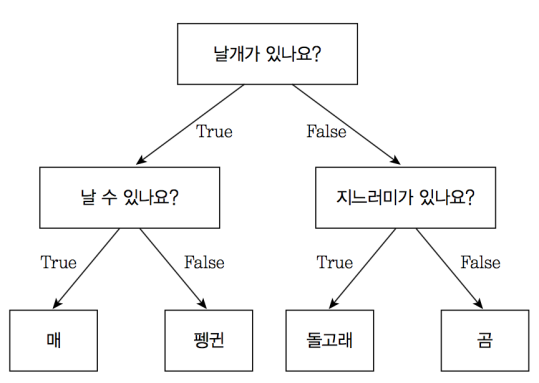

필수 용어는 다음과 같이 정리할 수 있다.

**루트(Root) 노드**: 나무가 시작되는 노드를 의미함. 모든 데이터를 담고 있다.

**규칙 노드**: 스무고개라면 질문을 의미함. 제시된 규칙에 따라 데이터를 나눈다.

**리프(Leaf) 노드**: 결정된 값을 의미함. 회귀라면 숫자 결과값을 의미한다.




직관적인 해석이 가능하고 비모수적이라는 장점이 있으나 데이터의 개수가 적을 경우 과대적합(Overfitting)이 발생하기 쉽다.

#Decision Trees pt.2 (Information Gain)

의사결정나무에서 매 규칙 노드는 어떻게 생성되는지는 하나의 규칙을 제정했을 때 얼마만큼의 정보를 얻었는가와 연관된다. 

정보를 얻는다는 것은 무엇을 의미하는가?
이를 위해서는 Impurities에 대한 이해가 필요하다. Impurities에는 무엇이 있는가? Impurities의 측정에는 이러한 것들이 있다.


> The dispersal of Energy



> Entropy



> Genie index


> Randomness



> RMSE



> And more












아래의 수식은 Impurities를 Entropy의 차원에서 정의했을 때의 수식이다. Genie, RMSE 등 여타 척도를 가지고 평가할 수도 있다.

$$ Information \ Gain = Entropy_{before}-Entropy_{after} $$

$$ Entropy_{before} = e(S) \\ Entropy_{after} = \sum{p(S_{f})e(S_{f})}$$

$$ e(x) = -\sum{p(x)log(x)} $$

Information Gain이 가장 큰 기준들 순서대로 규칙 노드들이 생성된다. 사람을 맞히는 스무 고개에서 제일 먼저 할 질문이 무엇일지 생각하면 쉽게 이해할 수 있다. (Ex. 성별은 무엇인지, 안경은 썼는지 등 그 기준에 따라 최대한 균등하게 집단들을 구분할 수 있는 질문을 할 것이다.)

# 회귀 평가 지표

$$ MAE(Mean\ Absolute \ Error) = {\frac1n}\sum(|Y-\hat{Y}|) $$

$$ MSE(Mean \ Squared \ Error) = {\frac1n}\sum(Y-\hat{Y})^2 $$

$$ RMSE(Root \ Mean \ Squared \ Error) = \sqrt{{\frac1n}\sum(Y-\hat{Y})^2} $$

$$ 0< R^2  = \frac{Var(\hat{Y})}{Var(Y)} < 1$$

#모델 코드 구현

In [ ]:
#싸이킷런은 각종 머신러닝 패키지가 들어있는 모듈. 
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.model_selection import train_test_split #학습 데이터셋, 검증 데이터셋 분리
from sklearn.preprocessing import PolynomialFeatures #다항회귀
from sklearn.metrics import r2_score,mean_squared_error #평가지표. Loss 계산방식.
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor #Decision Trees는 분류에서 더 잘 쓰지만 regression에서도 연습 가능.
from sklearn.tree import export_graphviz
import graphviz

Linear Regression

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
x = df.iloc[:, :-1] #charges 제외 모든 feature 추출.
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156) #학습, 검증 데이터로 나눠주는 과정.


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )
#train data는 1070개, test data는 268개.

(1070, 6) (1070,) (268, 6) (268,)


In [ ]:
lr = LinearRegression(fit_intercept = True) #선형회귀 class. fit_intercept = True로 설정해서 b0도 포함. 
lr.fit(X_train, y_train) #선형회귀에 train data로 학습



LinearRegression()

In [ ]:
lr.coef_ #b1~b6까지의 값을 array로표현. coefficients : 계수 : parameters 
#age,	sex,	bmi,	children,	smoker,	region 이 변수들이었음.


array([  255.23521357,  -157.46928633,   346.66121286,   602.48556758,
       23718.80891456,  -425.02862186])

In [ ]:
lr.coef_[0] #b1값에 접근하고 싶을 때

255.2352135728639

In [ ]:
lr.intercept_ #절편. b0값

-12177.737854141498

In [ ]:
#위 선형회귀 계수들에 대한 해석. 
#age는 1씩 늘어날 때마다 통상 건강보험료가 255정도 올라간다는 것. 
#sex는 남자가 1, 여자가 0이므로 남자이면 157정도 내려간다. 즉 남자가 여자보다 보통 157정도 건강보험료가 낮다.
#bmi는 1씩 올라갈 때마다 346 정도 건보료가 올라간다. 
#children은 1명씩 생길 때마다 602 정도 건보료가 올라간다.
#smoker는 흡연자는 1, 비흡연자는 0이므로 비흡연자보다 흡연자가 통상 23718정도 건보료가 높다. 
#region은 #southeast = 2, southwest = 3, northwest = 1, northeast = 0이므로 northeast -> northwest -> southeast -> southwest 로 넘어갈 때마다 425씩 건보료가 낮아진다는 의미. 

In [ ]:
y_train_pred = lr.predict(X_train) #생성 모델에 train dataset 넣어서 결과 확인.
y_test_pred = lr.predict(X_test)   #생성 모델에 test dataset 넣어서 결과 확인. 이것이 test score가 되는 것. 
#test score 
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred) 
print("train score : ", train_r2, " test score: ", test_r2)

train score :  0.7483484869599253  test score:  0.7585772057589387


In [ ]:
lr.score(X_test, y_test) #이러한 메소드로도 test score를 구할 수 있다. 

0.7585772057589387

Text(0.5, 1.0, 'Linear regression residual plot')

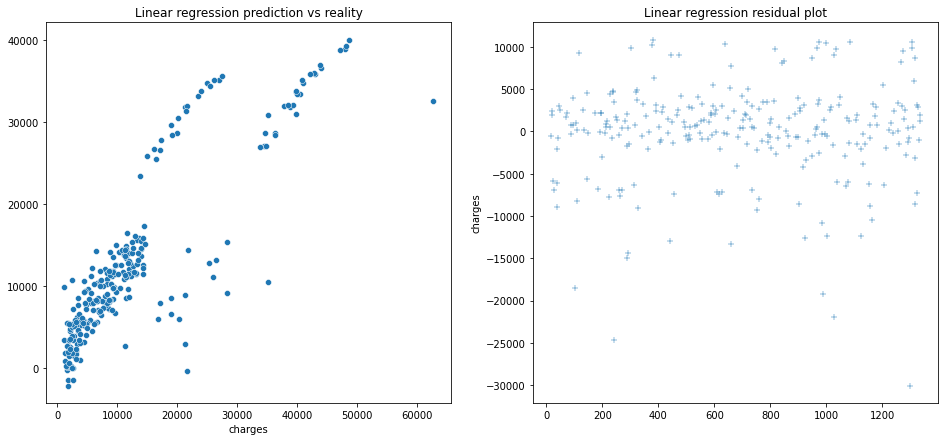

In [ ]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121) 
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)  
ax_1.set_title("Linear regression prediction vs reality") #prediction, reality를 각각 x와 y에 두고 그린 것. y=x에 가까이 그려져 있으면 좋음.
ax_2 = ax.add_subplot(122) 
resid = y_test_pred - y_test #잔차 계산
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2)
ax_2.set_title("Linear regression residual plot") #잔차 플롯. (예측값-실제값)을 그린 것이기에 0에 가까이 분포해 있으면 좋음. 

Quadratic regression(2nd order polynomial regression)

In [ ]:
#이럴 때 비선형회귀의 가장 대표적 모델인 다항회귀를 적용해 보자. 
quad = PolynomialFeatures(degree = 2) #2차 다항회귀, 변수의 개수는 6개.
X_quad = quad.fit_transform(x)
X_quad.shape #6개였던 column이 28개로 확장되게 됨. 6h2 = 7c2 = 28
#그러면 만약 x 변수(기존의 컬럼 개수)가 4개인데 3차(cubic) 다항회귀를 하게 되면 column은 몇 개로 확장되게 될까?

(1338, 28)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, random_state = 156)

plr = LinearRegression()
plr.fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print("2차 다항회귀 r2 score: ", plr.score(X_test,y_test))

2차 다항회귀 r2 score:  0.832434784864428


Text(0.5, 1.0, 'Quadratic regression residual plot')

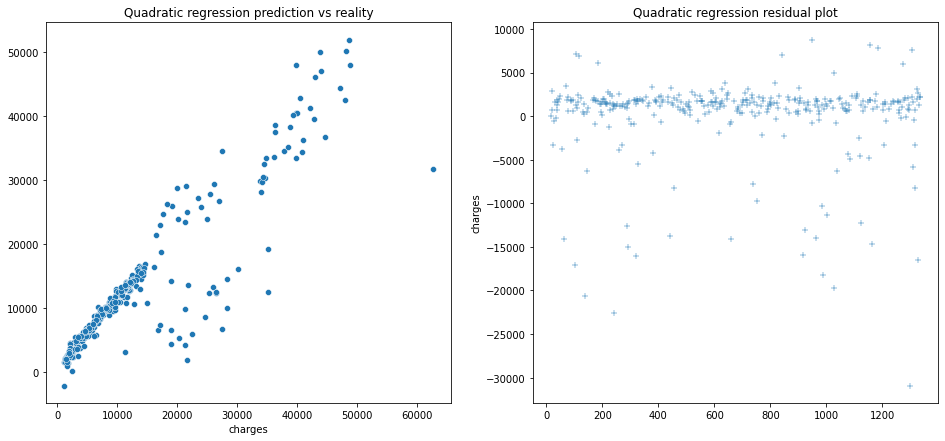

In [ ]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121)
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)  
ax_1.set_title("Quadratic regression prediction vs reality")
ax_2 = ax.add_subplot(122) 
resid = y_test_pred - y_test #잔차 계산
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2)
ax_2.set_title("Quadratic regression residual plot")

Cubic regression(3rd order polynomial regression)

In [ ]:
#3차 다항회귀
cube = PolynomialFeatures(degree = 3)
X_cube = cube.fit_transform(x) 
X_cube.shape

(1338, 84)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cube, y, random_state = 156)
cb = LinearRegression()
cb.fit(X_train,y_train)

y_train_pred = cb.predict(X_train)
y_test_pred = cb.predict(X_test)

print("3차 다항회귀 r2 score: ", cb.score(X_test,y_test))

#Overfitting 

3차 다항회귀 r2 score:  0.8266017419267235


Text(0.5, 1.0, 'Cubic regression residual plot')

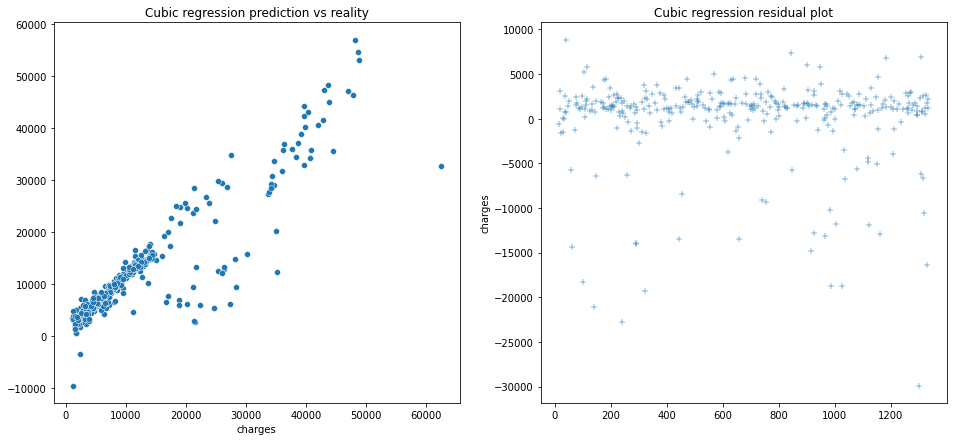

In [ ]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121)
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)  
ax_1.set_title("Cubic regression prediction vs reality")
ax_2 = ax.add_subplot(122) 
resid = y_test_pred - y_test
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2)
ax_2.set_title("Cubic regression residual plot")

Decision Tree

In [ ]:
tree_reg = tree.DecisionTreeRegressor(max_depth = 3) #max_depth 는 스무 고개의 질문의 개수를 의미. 규칙 노드의 최대 개수를 결정.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156) #학습, 검증 데이터로 나눠주는 과정.
tree_reg.fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test)
print("DecisionTree score: ", tree_reg.score(X_test,y_test))

DecisionTree score:  0.8720639173862283


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


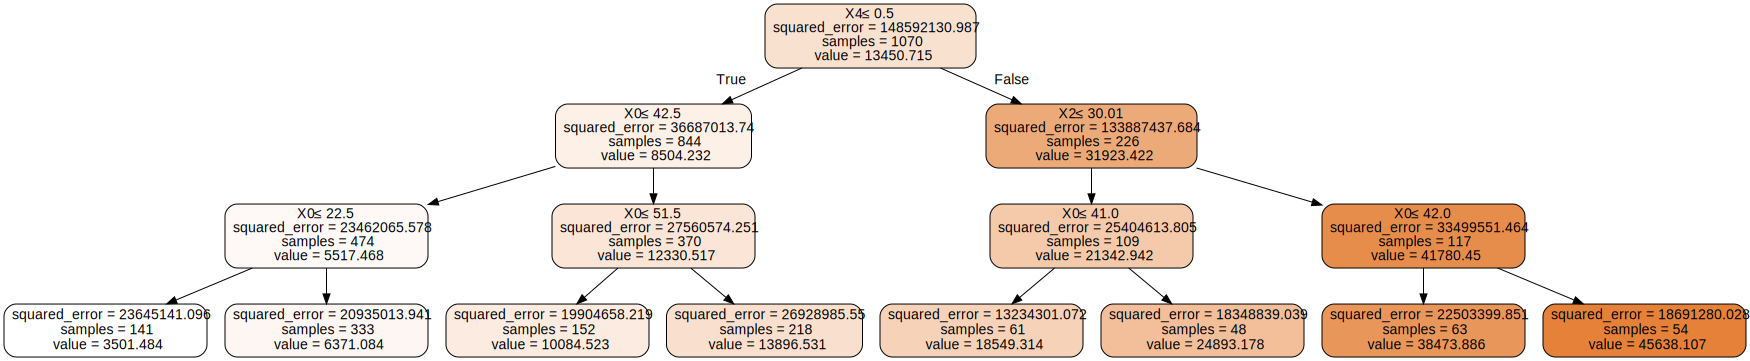

In [ ]:
dot_data4 = tree.export_graphviz(tree_reg, out_file=None,  
                                filled=True, rounded=True,  
                                special_characters=True, impurity = True) #Decision Tree 시각화
graph4 = graphviz.Source(dot_data4) 
graph4


#Classification

Classification(분류)이란 지도학습의 일종으로 대상 데이터에 라벨을 부여하는 일을 통칭한다. 

Classification의 아이디어를 바탕으로 할 수 있는 일들에는 다음과 같은 것들이 있다.


>단순 분류

사기 검출, 이상치 탐지, 암 진단, 정상/비정상 구분 등



> 분류 + NLP

스팸 이메일 분류, 감정 분석, 어법 진단 등


> 분류 + CV

지문 인식, 얼굴 인식, 동작 예측, 동작 구분, 화풍 판단, 필기 인식 등

> 분류 + Audio


음성 인식, 장르 구분 등



> 분류 + Recommendation System

음악 추천, 넷플릭스 자동 추천, 유튜브 알고리즘(?)










# Titanic Data EDA

기초 분석

In [ ]:
titanic = pd.read_csv("/content/gdrive/MyDrive/23w MLWIKI/titanic.csv") 
#타이타닉에 탔던 사람들의 신원 정보 데이터셋이다. Survived; 즉 다른 features를 보고 생존했는지 여부를 알아맞히는 문제이다. 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
"""
survival:	Survival [0 = No, 1 = Yes]
pclass:	Ticket class	[1 = 1st, 2 = 2nd, 3 = 3rd]
sex:	Sex	
Age:	Age [in years]	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	[C = Cherbourg, Q = Queenstown, S = Southampton]

"""

'\nsurvival:\tSurvival [0 = No, 1 = Yes]\npclass:\tTicket class\t[1 = 1st, 2 = 2nd, 3 = 3rd]\nsex:\tSex\t\nAge:\tAge [in years]\t\nsibsp:\t# of siblings / spouses aboard the Titanic\t\nparch:\t# of parents / children aboard the Titanic\t\nticket:\tTicket number\t\nfare:\tPassenger fare\t\ncabin:\tCabin number\t\nembarked:\tPort of Embarkation\t[C = Cherbourg, Q = Queenstown, S = Southampton]\n\n'

In [ ]:
titanic.shape #데이터는 891개. 컬럼의 수는 12개

(891, 12)

In [ ]:
titanic.info() #Name, Sex, Ticket, Cabin, Embarked는 문자형으로 되어 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


결측치 처리

In [ ]:
#결측치 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Age, Cabin, Embarked에서 결측치가 발견되었는데 어떻게 처리할까?

In [ ]:
#Age는 평균으로 처리해 주자
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [ ]:
#Cabin은 결측치가 거의 대부분인데 필요가 있을까? 이 피처는 쓰지 않는 것이 좋을 듯.
titanic = titanic.drop(["Cabin"], axis = 1 )
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Embarked는 어디서 승선했는지의 여부인데 categorical variables이기에 최빈값으로 대체하도록 하겠다. 
#결측치가 두 개밖에 안 되어서 처리 방식은 그다지 중요하지 않을듯.
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts()[0]) #최빈값으로 fillna를 해 줌.


In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

target 접근: 얼마나 많은 사람이 살아남았는가?

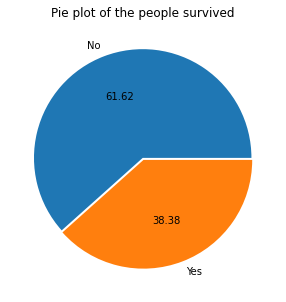

In [ ]:
ax = plt.figure(figsize = (16, 5)) #빈 캔버스 생성
plt.pie(titanic["Survived"].value_counts(), explode = [0.01, 0.01], labels = ["No", "Yes"], autopct = "%.2f") 
#생존자의 수를 바탕으로 파이플롯 작성. explode는 각 파이들이 얼마나 중점으로부터 떨어질지를 결정. labels는 각 파이의 이름을 의미. autopct는 자동으로 퍼센트를 표기하겠다는 의미.
plt.title("Pie plot of the people survived")
plt.show()

성별과 생존의 상관관계 분석

In [ ]:
titanic.groupby(by = ["Sex", "Survived"])["Survived"].count()
#남성이 여성보다 많이 죽은 것을 확인할 수 있음.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

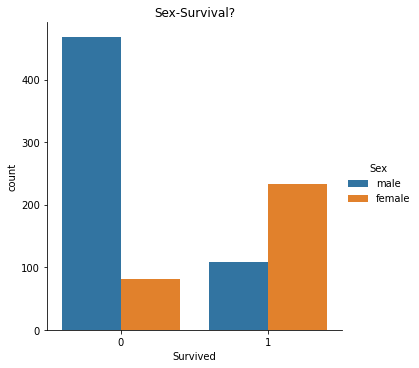

In [ ]:
#Sex, Survived 모두 categorical variables 이기 때문에 catplot이 적절함.
sns.catplot(x = "Survived", kind = "count", hue = "Sex", data = titanic)
plt.title("Sex-Survival?")
plt.show()

티켓 클래스와 생존간의 상관관계분석

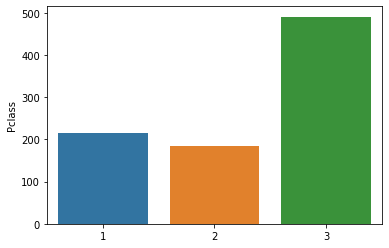

In [ ]:
#티켓 클래스는 categorical 변수 중에서도 순서형 변수이다. 즉 그 숫자의 순위가 의미를 갖고 있음. 1은 최우등석, 2는 우등석, 3는 일반석이기 때문.
sns.barplot(x = titanic["Pclass"].value_counts().index, y = titanic["Pclass"].value_counts())


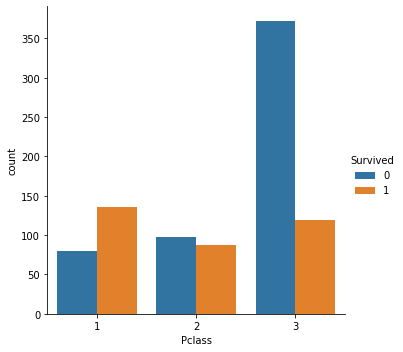

In [ ]:
sns.catplot(x = "Pclass", kind = "count", hue = "Survived", data = titanic)
#아무래도 1등석에 탄 사람들이 생존확률이 높았음. 구조 확률이 더 높았을 것이라고 생각할 수 있음.

Feature Engineering

In [ ]:
#sibsp, parch 는 각각 친척/배우자의 수 와 부모님의 수를 의미함. 이를 합쳐서 family_size라는 변수로 만들어보자.
#이와 동시에 sibsp+parch인 총 동승 가족의 수가 0명인 사람에 대해 alone이라는 변수명을 부여해주자.

In [ ]:
titanic['Family_Size'] = 0 #Family_size라는 열 생성 및 0으로 초기화.
titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp'] #가족 수를 계산해주기.
titanic['Alone'] = 0 #Alone이라는 이진분류용 열 생성 및 0으로 초기화.
titanic.loc[titanic["Family_Size"] == 0,"Alone"] = 1 #Family_size 가 0인사람은 1로 라벨링. 나머지는 여전히 0

In [ ]:
#Name, PassengerID, Ticket는 중요하지 않은 변수임. 생존분석에 어떠한 도움도 주지 않는다는 것을 직관적으로 이해할 수 있음.
titanic = titanic.drop(["Name", "PassengerId", "Ticket"], axis =1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 2주차 과제

0. 모든 코드를 다 필사하라. (Titanic Data EDA랑 텍스트는 필사할 필요 없음)

#1. 주어진 데이터 X와 y, b1와 b0을 바탕으로 다음의 과제를 수행하라.




 













> 1-(1). X와 y의 관계를 나타내는 단순 선형회귀식을 제안하라(절편 있음).

In [ ]:
X = np.array([np.random.normal(3, 1) for i in range(1000)]) 
y = np.array(4000*X-210)
#y는 X의 정확히 4000배에 210을 빼게끔 정의

> 1-(2). OLS 형식의 비용함수 코드를 제작하라.



> 1-(3). 아래 코드에 이어 b_1_array, b_0_array를 바탕으로 loss를 계산하여 100000개의 비용 값으로 이루어진 array "loss_array"를 만들어라. (단, 코드 실행에 약 2분이 소요되며, 비용 array의 변수명은 "loss_array"여야 함)

In [ ]:
b_1_array = np.array([np.random.normal4000, 100) for i in range(100000)])
b_0_array = np.array([np.random.normal(100, 100) for i in range(100000)])



> 1-(4). 아래의 코드를 실행해 loss 값을 시각화하고 최적의 b1과 b0을 제안하라. (코드 실행에 약 30초 소요)



In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30, 60))
plt.title("Loss")
ax = fig.add_subplot(311, projection='3d')
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "inferno")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax = fig.add_subplot(312, projection = "3d")
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "rainbow")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax.view_init(elev=0, azim=0)
ax = fig.add_subplot(313, projection = "3d")
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "Oranges_r")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax.view_init(elev=0, azim=90)
plt.show()



> 1-(5). 최적의 b1과 b0의 지점에서 비용함수 곡선의 기울기는 어떠한지 해석하라.





> 1-(6). (추가 과제) 위에서 작성한 OLS 식을 b0에 대해 편미분해 비용함수가 최소가 되게끔 하는 b0의 추정량은 아래와 같다. 이를 증명하라.
$$  b_{0} = \bar{y}- b_{1}\bar{x}  $$

 




> 1-(7). (추가 과제) b0의 추정량을 OLS 식에 대입해 b1에 대해 편미분하라. 




> 1-(8). (추가 과제) 1-(7)의 편미분방정식이 0이 되도록 하는 b1의 추정량은 아래와 같다. 이를 증명하라.

$$ {\sum{(x-\bar{x})(y-\bar{y})} \over{\sum{(x-\bar{x}})^2}} = b_{1} $$





> 1-(9). (추가 과제) 파이썬을 활용해 실제로 b0과 b1을 구해보고, 이 값들이 1-(4)에서 제안한 최적의 b0, b1값과 부합하는지 확인하라.



#2. 주어진 데이터 kc_house_data.csv를 바탕으로 다음의 과제를 수행하라.



> 2-(1). https://www.notion.so/deepdaiv/4efbe5caadfc44758b978a594fcdf486#bdc0a05dec2340bfa399693dee6e0cbe 에서 kc_house_data.csv 데이터를 불러오고 info와 describe, shape 등 메소드를 바탕으로 데이터를 개괄하라.





> 2-(2). 본 데이터셋은 타 feature들을 바탕으로 집값(price)를 예측해 볼 수 있는 데이터셋이다. 결측치가 있는지 확인하고, 있다면 적절하게 처리하라.





> 2-(3). Domain Knowledge를 활용하거나 실험을 통해 데이터에 대해 각기 다른 인사이트를 담은 시각화를 두 가지 수행하라.




> 2-(4). 집값 예측에 필요하지 않은 열이 있다면 처리하고 그 근거를 제시하라.





> 2-(5). price 컬럼은 y로, 그 외 컬럼은 X로 상정한 뒤 train_test_split을 활용해 학습 데이터 셋과 검증 데이터 셋으로 분리하라.





> 2-(6). LinearRegression을 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.





> 2-(7). 2-(6) 에서 만든 LinearRegression의 coef(계수)를 불러와 각 feature가 집값에 미치는 영향에 대해 해석하라.





> 2-(8). PolynomialRegression을 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.





> 2-(9). DecisionTree를 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.





> 2-(10). 2-(9) 의 결과로 생성된 모델의 tree를 시각화하라.

